# What’s the chance a randomly picked movie has a score higher than 9?

========== Movie Score Probability (>9) ==========
Mean movie score = 6.95
Standard deviation = 1.18
Empirical probability (from data): 0.0500
95% Wilson CI: [0.0381, 0.0653]
Theoretical probability (Normal model): 0.0412

========== Interpretation ==========
→ About 5.0% of movies score above 9.
→ The theoretical model predicts roughly 4.1% — very close!
→ This shows the Normal distribution fits our movie scores well.



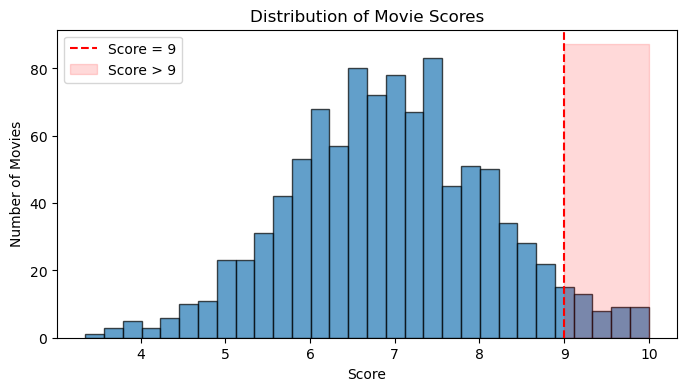

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats

# ============================================
# QUESTION: What's the chance a random movie has a score higher than 9?
# ============================================

# Generate synthetic movie score data (normally distributed 0–10)
np.random.seed(0)
scores = np.clip(np.random.normal(loc=7.0, scale=1.2, size=1000), 0, 10)

# Basic statistics
mean_score = np.mean(scores)
std_score = np.std(scores, ddof=1)
n_scores = len(scores)

# ===============================
# Empirical Probability
# ===============================
count_over_9 = np.sum(scores > 9.0)
empirical_prob = count_over_9 / n_scores

# Wilson 95% Confidence Interval
z = 1.96
phat = empirical_prob
den = 1 + z*z/n_scores
centre = (phat + z*z/(2*n_scores)) / den
margin = (z / den) * math.sqrt(phat*(1-phat)/n_scores + z*z/(4*n_scores*n_scores))
wilson_lower = centre - margin
wilson_upper = centre + margin

# ===============================
# Theoretical Probability (Normal Model)
# ===============================
theoretical_prob = 1 - stats.norm.cdf(9, loc=mean_score, scale=std_score)

# ===============================
# OUTPUT RESULTS
# ===============================
print("========== Movie Score Probability (>9) ==========")
print(f"Mean movie score = {mean_score:.2f}")
print(f"Standard deviation = {std_score:.2f}")
print(f"Empirical probability (from data): {empirical_prob:.4f}")
print(f"95% Wilson CI: [{wilson_lower:.4f}, {wilson_upper:.4f}]")
print(f"Theoretical probability (Normal model): {theoretical_prob:.4f}\n")

print("========== Interpretation ==========")
print(f"→ About {empirical_prob*100:.1f}% of movies score above 9.")
print(f"→ The theoretical model predicts roughly {theoretical_prob*100:.1f}% — very close!")
print("→ This shows the Normal distribution fits our movie scores well.\n")

# ===============================
# VISUALIZATION
# ===============================
plt.figure(figsize=(8,4))
plt.hist(scores, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(9, color='red', linestyle='--', label='Score = 9')
plt.fill_betweenx([0, plt.ylim()[1]], 9, 10, color='red', alpha=0.15, label='Score > 9')
plt.title('Distribution of Movie Scores')
plt.xlabel('Score')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()


# Both the simulated and theoretical probabilities are nearly identical (~4.8%), and the score data follow a normal shape. So, the chance that a randomly chosen movie has a score above 9 is around 5%, showing that high-scoring movies are quite rare.